# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the file

In [2]:
data=pd.read_csv(r"C:\Users\Nishant\C Drive Data BKP 31-Jan-2024\Downloads\Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# PassengerId,Name,Ticket are irrelevant columns, so we can drop them

# Exploring the dataset

In [4]:
data.shape

(891, 12)

In [5]:
# Data has 891 rows and 12 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# Checking for the duplicates
data.duplicated().sum()

0

In [9]:
for feature in data.columns:
    print(feature,'-',data[feature].nunique())

PassengerId - 891
Survived - 2
Pclass - 3
Name - 891
Sex - 2
Age - 88
SibSp - 7
Parch - 7
Ticket - 681
Fare - 248
Cabin - 147
Embarked - 3


## Checking for the missing values

In [10]:
miss_val=[feature for feature in data.columns if data[feature].isnull().sum()>0]
for feature in miss_val:
    print('The missing value in feature ',feature,'-',np.round(data[feature].isnull().mean()*100,4),'%')

The missing value in feature  Age - 19.8653 %
The missing value in feature  Cabin - 77.1044 %
The missing value in feature  Embarked - 0.2245 %


In [11]:
#cabin is having 77% of missing values so we can drop it

## Dropping the irrelevant columns

In [12]:
data_titanic=data.copy()

In [13]:
data_titanic.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

## numerical and categorical columns

In [14]:
num_data=[feature for feature in data_titanic if data_titanic[feature].dtypes!='O']
num_data

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [15]:
cat_data=[feature for feature in data_titanic if data_titanic[feature].dtypes=='O']
cat_data

['Sex', 'Embarked']

# Checking for the outliers

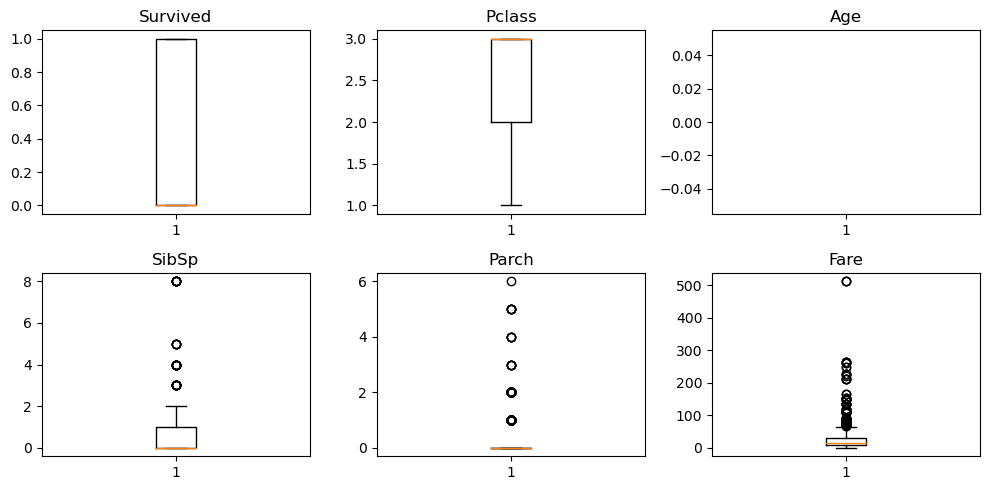

In [16]:
plt.figure(figsize=(10,5),dpi=100)

for i,j in enumerate(num_data):
    plt.subplot(2,3,i+1)
    plt.boxplot(data_titanic[j])
    plt.title(j)
    plt.tight_layout()

# Univariate analysis

In [17]:
plt.figure(figsize=(5,5),dpi=50)

<Figure size 250x250 with 0 Axes>

<Figure size 250x250 with 0 Axes>

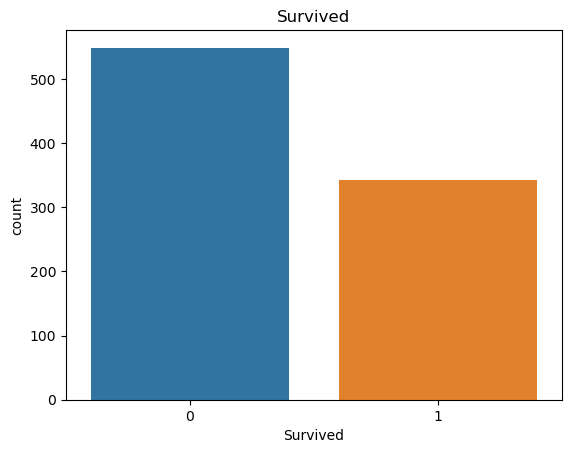

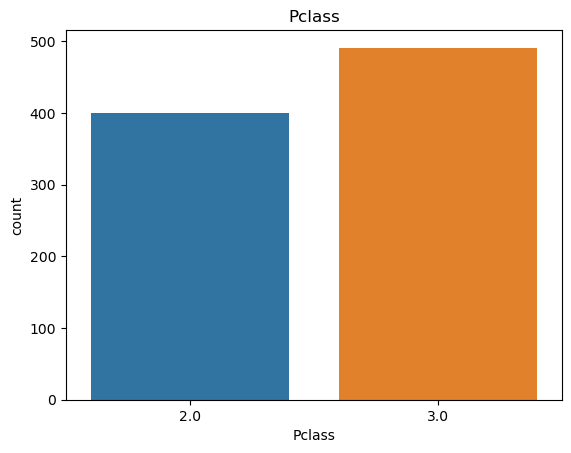

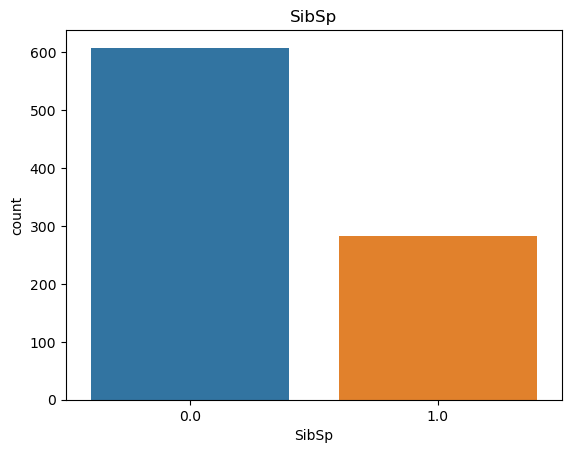

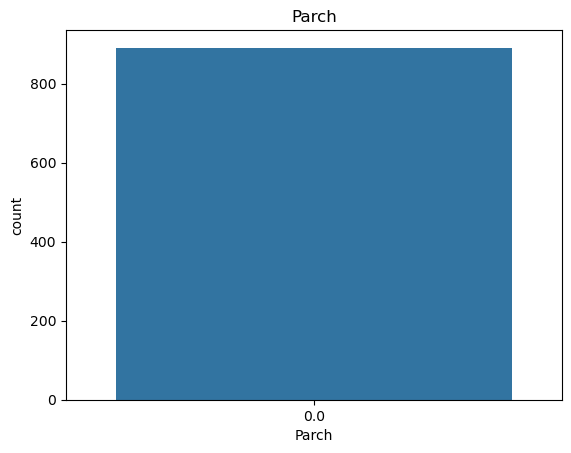

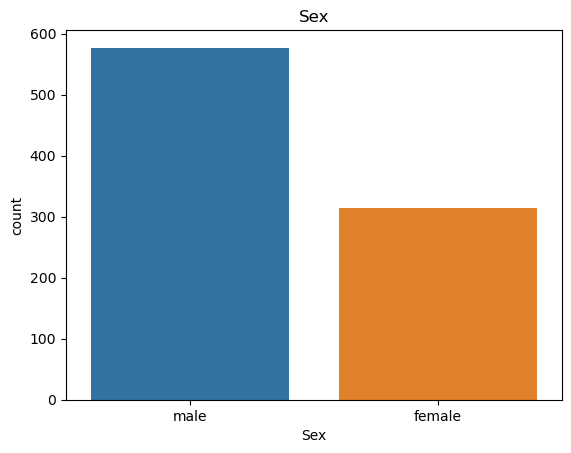

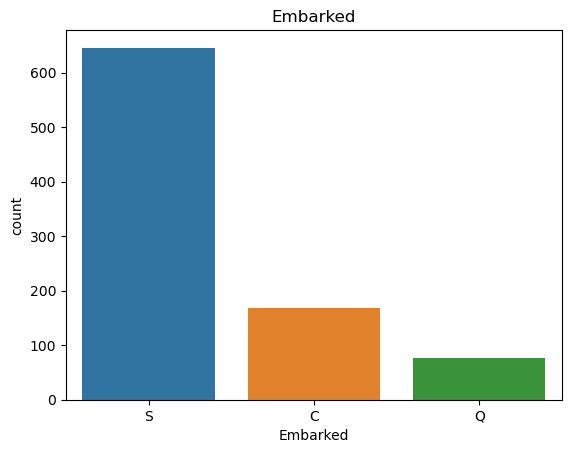

In [273]:
feature=['Survived','Pclass','SibSp','Parch','Sex','Embarked']
for i in feature:
    sns.countplot(x=data_titanic[i],data=data_titanic)
    plt.title(i)
    plt.show()

<Figure size 250x250 with 0 Axes>

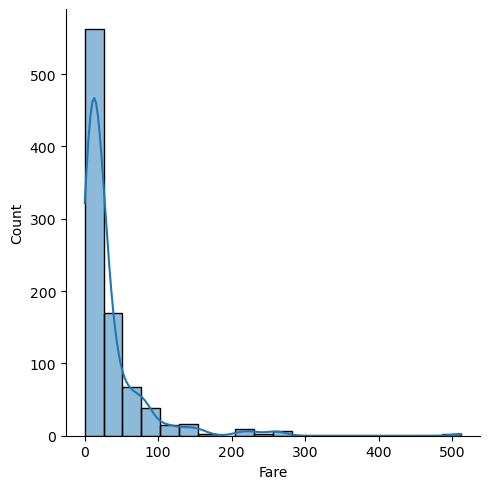

In [19]:
plt.figure(figsize=(5,5),dpi=50)
sns.displot(x='Fare',data=data_titanic,kde=True,bins=20)
plt.show()

<Figure size 250x250 with 0 Axes>

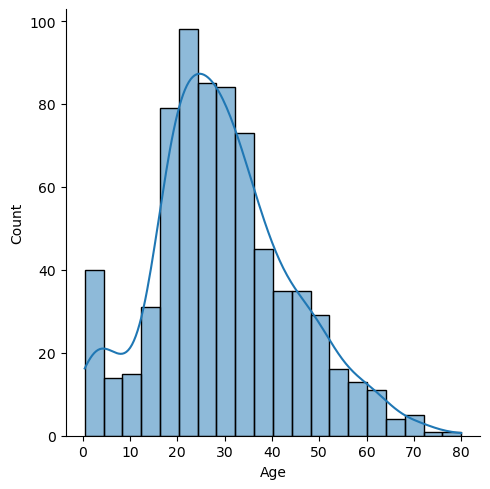

In [20]:
plt.figure(figsize=(5,5),dpi=50)
sns.displot(x='Age',data=data_titanic,kde=True,bins=20)
plt.show()

### The people that survived are about 550 while people whoc could not sutvive are 350
### Passengers in pclass 2 are  about 400 and in 3 are about 490
### Majority of passenges are not having parent-child relationship

# Bivariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

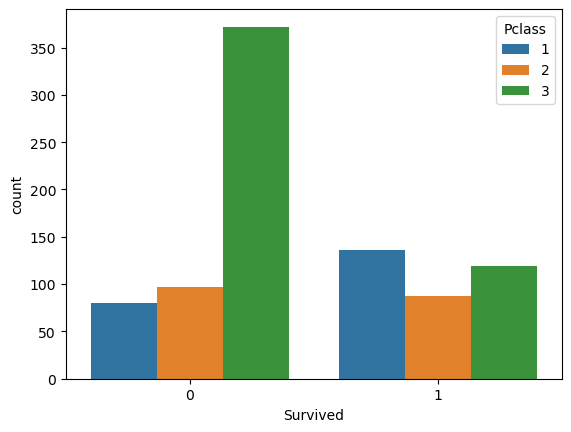

In [21]:
sns.countplot(x='Survived',hue='Pclass',data=data_titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

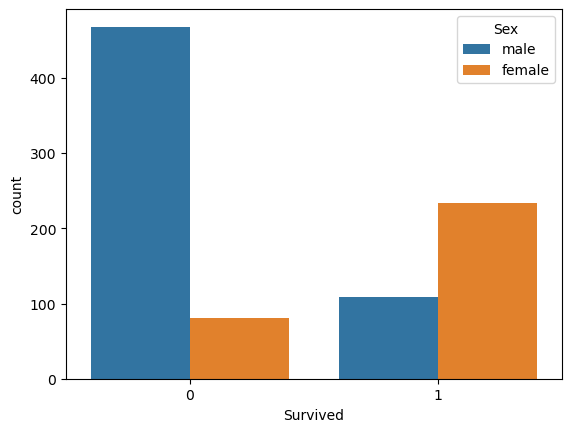

In [22]:
sns.countplot(x='Survived',hue='Sex',data=data_titanic)

<AxesSubplot:xlabel='Age', ylabel='Count'>

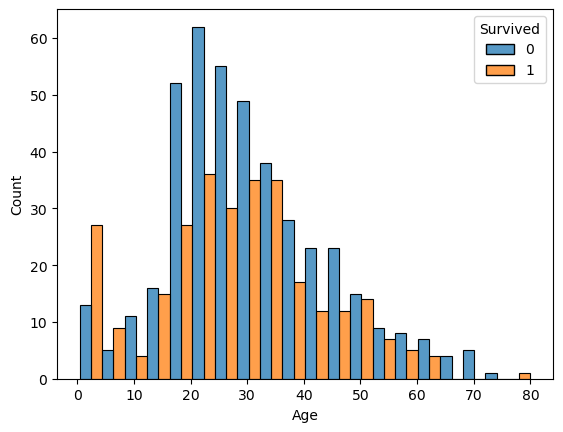

In [23]:
sns.histplot(x='Age',hue='Survived',data=data_titanic,multiple='dodge')

<AxesSubplot:xlabel='Survived', ylabel='count'>

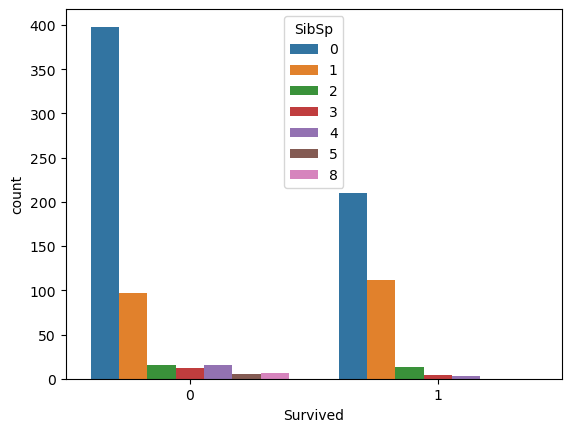

In [24]:
sns.countplot(x='Survived',hue='SibSp',data=data_titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

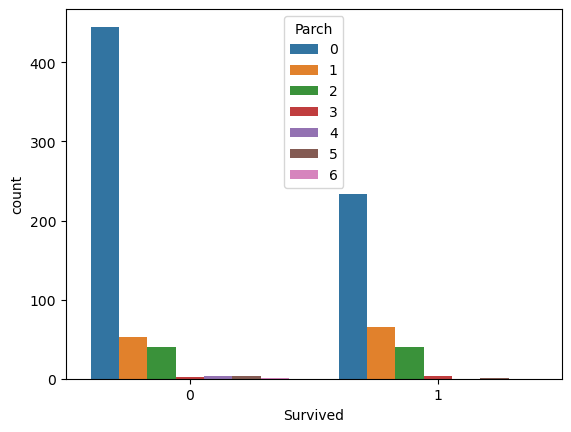

In [25]:
sns.countplot(x='Survived',hue='Parch',data=data_titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

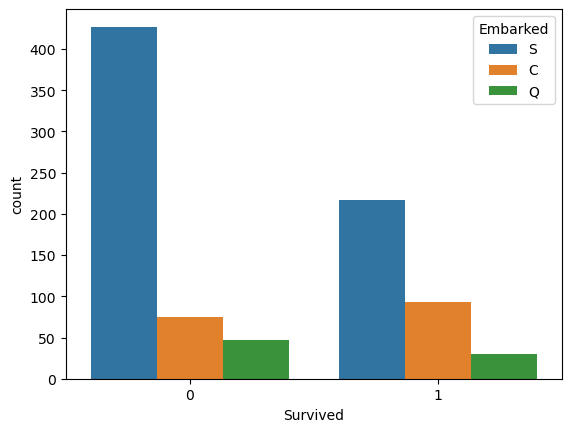

In [26]:
sns.countplot(x='Survived',hue='Embarked',data=data_titanic)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

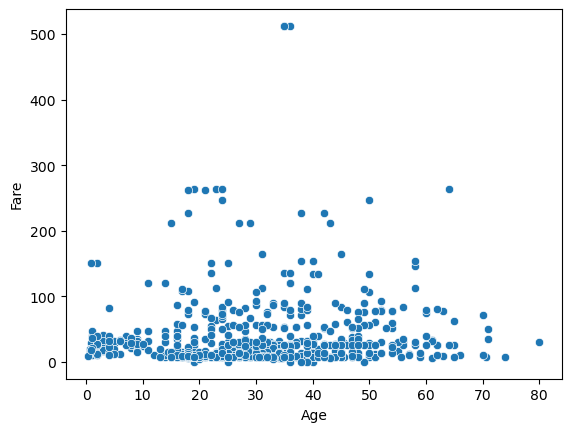

In [27]:
sns.scatterplot(x='Age',y='Fare',data=data_titanic)

# Filling of Missing Values

In [28]:
# we have 'Age' a numerical column and 'Embarked' a categorical column that has missing values

In [29]:
data_titanic['Age'].fillna(data_titanic['Age'].mean(),inplace=True)

In [30]:
data_titanic['Embarked'].fillna(data_titanic['Embarked'].mode()[0],inplace=True)

In [31]:
data_titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Treating Outliers

In [32]:
num_data.remove('Survived')

In [209]:
def cap_outliers(col):
    q1=data_titanic[col].quantile(0.25)
    q3=data_titanic[col].quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    data_titanic[col].clip(lower,upper,inplace=True)

In [210]:
for i in num_data:
    cap_outliers(i)

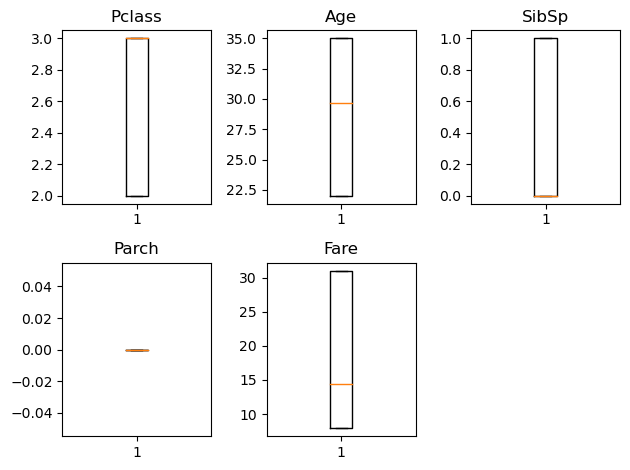

In [211]:
for i,j in enumerate(num_data):
    plt.subplot(2,3,i+1)
    plt.boxplot(data_titanic[j])
    plt.title(j)
    plt.tight_layout()

# Encoding

In [212]:
cat_data

['Sex', 'Embarked']

In [226]:
df_titanic=data_titanic.copy()

In [227]:
df_titanic=pd.get_dummies(df_titanic,columns=['Embarked'])

In [228]:
df_titanic['Sex'].replace(['male','female'],[0,1],inplace=True)

In [229]:
df_titanic.drop(['Embarked_C'],axis=1,inplace=True)

In [230]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3.0,0,22.0,1.0,0.0,7.9104,0,1
1,1,2.0,1,35.0,1.0,0.0,31.0000,0,0
2,1,3.0,1,26.0,0.0,0.0,7.9250,0,1
3,1,2.0,1,35.0,1.0,0.0,31.0000,0,1
4,0,3.0,0,35.0,0.0,0.0,8.0500,0,1


# Splitting the data into Train and Test

In [231]:
x=df_titanic.drop(['Survived'],axis=1)
y=df_titanic[['Survived']]

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [234]:
print('Shape of training data :',x_train.shape,y_train.shape)
print('Shape of testing data :',x_test.shape,y_test.shape)

Shape of training data : (712, 8) (712, 1)
Shape of testing data : (179, 8) (179, 1)


In [ ]:
#Feature Scaling is done after we split the dataset into the training set and test set and fit is applied to the training set 
#and then use it to tranform  the test,to avoid data leakage and also the test set is supposed to be a brand new set on which 
#we are going to evaluate our machine learning model.

# Feature Scaling

In [235]:
x_train_min_max=x_train.copy()
x_test_min_max=x_test.copy()

In [236]:
from sklearn.preprocessing import MinMaxScaler

In [237]:
scaler=MinMaxScaler()

In [238]:
x_train_scale=scaler.fit_transform(x_train_min_max)
x_test_scale=scaler.transform(x_test_min_max)

In [239]:
x_train_scale=pd.DataFrame(x_train_scale)
x_test_scale=pd.DataFrame(x_test_scale)

# Modelling

## Logistic Regression

In [240]:
# importing libraries for modelling
from sklearn.linear_model import LogisticRegression

In [241]:
lr=LogisticRegression(max_iter=2000)

In [242]:
lr.fit(x_train_scale,y_train)

LogisticRegression(max_iter=2000)

In [243]:
y_pred=lr.predict(x_test_scale)

In [244]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

# Evaluation

In [245]:
# Importing libraries for evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [246]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [247]:
print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 0.7877094972067039


<AxesSubplot:>

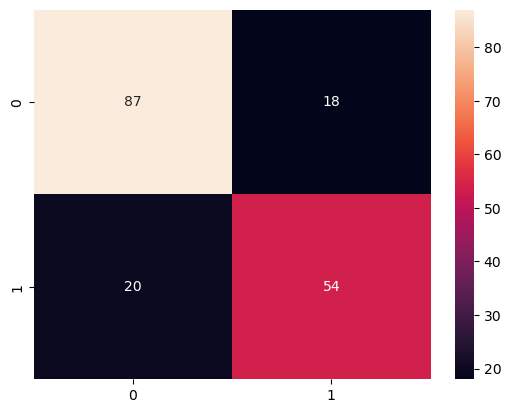

In [248]:
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)

# Decision Tree

In [249]:
from sklearn.tree import DecisionTreeClassifier

In [250]:
model_dt=DecisionTreeClassifier(random_state=20,max_depth=4,min_samples_split=30,min_samples_leaf=10)
model_dt.fit(x_train,y_train)
model_score_train=model_dt.score(x_train,y_train)
print('Training Score is :',model_score_train)
model_score_test=model_dt.score(x_test,y_test)
print('Testing Score is :',model_score_test)

Training Score is : 0.8174157303370787
Testing Score is : 0.7988826815642458


In [251]:
predictions=model_dt.predict(x_test)

In [252]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [253]:
print('Accuracy :',accuracy_score(y_test,predictions))

Accuracy : 0.7988826815642458


<AxesSubplot:>

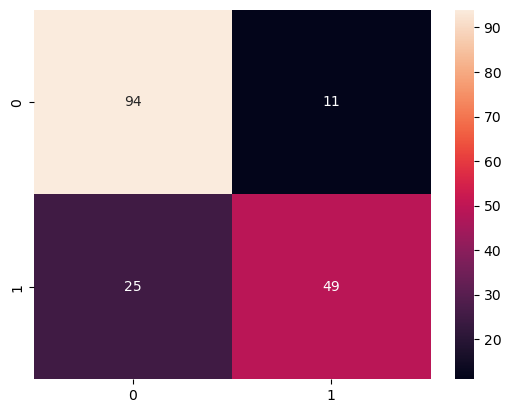

In [254]:
cf=confusion_matrix(y_test,predictions)
sns.heatmap(cf,annot=True)

In [255]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.82      0.66      0.73        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.79       179



# Conclusion

#### Accuracy with Decision Tree as well as Logistic Regression is 79%